In [1]:
###########################################
## Author : https://github.com/vidit1999 ##
###########################################

In [2]:
import re
import random
import joblib
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score,
    precision_score, recall_score,
    plot_confusion_matrix
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
random.seed(0)
np.random.seed(0)

In [4]:
df = pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
stop_words = stopwords.words('english')
lemma = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() # lowering
    text = text.encode("ascii", "ignore").decode() # non ascii chars
    text = re.sub(r'\n',' ', text) # remove new-line characters
    text = re.sub(r'\W', ' ', text) # special chars
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) # single char at first
    text = re.sub(r'[0-9]', ' ', text) # digits
    text = re.sub(r'\s+', ' ', text, flags=re.I) # multiple spaces
    return ' '.join([lemma.lemmatize(word) for word in word_tokenize(text) if word not in stop_words])

In [7]:
df['title'].fillna('titleunknown', inplace=True)
df['author'].fillna('authorunknown', inplace=True)

In [8]:
df.isnull().sum()

id         0
title      0
author     0
text      39
label      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


1    10413
0    10387
Name: label, dtype: int64


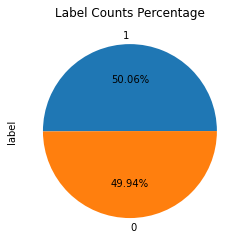

In [10]:
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='pie', title='Label Counts Percentage', autopct='%.2f%%')
plt.show()

In [11]:
%%time

df_title_author = (df['title'] + ' ' + df['author']).apply(clean_text)

Wall time: 7.05 s


In [12]:
x_train, x_test, y_train, y_test = train_test_split(df_title_author, df['label'])
len(x_train), len(x_test)

(15600, 5200)

In [13]:
tfidf_title_author = TfidfVectorizer(ngram_range=(1, 2))

train_x = tfidf_title_author.fit_transform(x_train)
test_x = tfidf_title_author.transform(x_test)

train_x, test_x

(<15600x111187 sparse matrix of type '<class 'numpy.float64'>'
 	with 306695 stored elements in Compressed Sparse Row format>,
 <5200x111187 sparse matrix of type '<class 'numpy.float64'>'
 	with 72348 stored elements in Compressed Sparse Row format>)

In [14]:
pac_title_author = PassiveAggressiveClassifier().fit(train_x, y_train)
y_pred = pac_title_author.predict(test_x)

Accuracy  : 0.9957692307692307
Precision : 0.9962034927866363
Recall    : 0.9954476479514416
F1-Score  : 0.9958254269449716


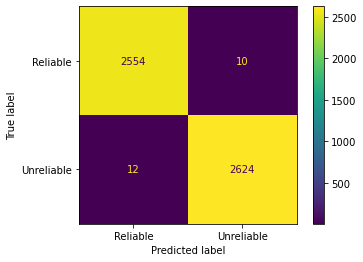

In [15]:
print(f"Accuracy  : {accuracy_score(y_test, y_pred)}")
print(f"Precision : {precision_score(y_test, y_pred)}")
print(f"Recall    : {recall_score(y_test, y_pred)}")
print(f"F1-Score  : {f1_score(y_test, y_pred)}")

plot_confusion_matrix(pac_title_author, test_x, y_test, display_labels=['Reliable', 'Unreliable'])
plt.show()

In [16]:
joblib.dump([tfidf_title_author, pac_title_author], 'checkpoint_ml_2.joblib')

['checkpoint_ml_2.joblib']